### Load MNIST data

In [1]:
# MNIST dataset can be automatically downloaded from within TensorFlow
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)    # labels are encoded as one-hot!

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
# Use the Interactive Session again
sess = tf.InteractiveSession()

### Start constructing the TensorFlow graph

In [4]:
# Define placeholders for input data and labels (with arbitrary batch size)
x = tf.placeholder(tf.float32, shape=[None, 784])    # input as vector of size 28*28 = 784
y_ = tf.placeholder(tf.float32, shape=[None, 10])    # labels as numbers 0 - 9

In [5]:
# Define auxiliary functions to create layers
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

### First convolutional layer: 32 filters of size 5x5 on input images (28x28x1)

In [6]:
# First convolutional layer
# Filter size: 5x5, color channels: 1, number of filters: 32
W_conv1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

# Transform MNIST images to 4-dimensional tensor:
# [MiniBatch, x, y, color_channels]
x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# Hint: use x.get_shape() to get the shape of variable x
print(h_pool1.get_shape())

(?, 14, 14, 32)


### Second convolutional layer: 64 filters of size 5x5 on output of MaxPooling layer of the first layer (14x14x32)

In [7]:
# Second convolutional layer
# Filter size: 5x5, input size: 32, number of filters: 64
W_conv2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

### Followed by two fully connected layers with 3136 and 1024 hidden neurons 

In [8]:
# Fully connected layer
W_fc1 = tf.Variable(tf.truncated_normal(shape=[7 * 7 * 64, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [9]:
# Add classification layer at the end
W_fc2 = tf.Variable(tf.truncated_normal(shape=[1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))

y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2

# Use softmax loss (just as before!)
softmax = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

### Setup training process

In [10]:
learning_rate = 0.0001
steps = 5000

# Basic gradient descent works well for smaller problems, 
# but for experimenting with larger neural networks,
# the Adam optimizer most of the time "just works".
omptimization = tf.train.AdamOptimizer(learning_rate).minimize(softmax)

In [11]:
sess.run(tf.global_variables_initializer())

# Calculate whether a prediction is correct or not
# This time we can include it in the training loop to check progress 
# during training on training data.
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initialize variables - as before
sess.run(tf.global_variables_initializer())


for i in range(steps):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1]})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    omptimization.run(feed_dict={x: batch[0], y_: batch[1]})

step 0, training accuracy 0.12
step 100, training accuracy 0.88
step 200, training accuracy 0.9
step 300, training accuracy 0.94
step 400, training accuracy 0.96
step 500, training accuracy 0.92
step 600, training accuracy 0.98
step 700, training accuracy 0.94
step 800, training accuracy 0.94
step 900, training accuracy 1
step 1000, training accuracy 0.94
step 1100, training accuracy 0.96
step 1200, training accuracy 0.98
step 1300, training accuracy 1
step 1400, training accuracy 0.98
step 1500, training accuracy 0.96
step 1600, training accuracy 1
step 1700, training accuracy 1
step 1800, training accuracy 0.98
step 1900, training accuracy 0.96
step 2000, training accuracy 1
step 2100, training accuracy 0.96
step 2200, training accuracy 1
step 2300, training accuracy 0.96
step 2400, training accuracy 0.98
step 2500, training accuracy 1
step 2600, training accuracy 1
step 2700, training accuracy 0.98
step 2800, training accuracy 0.98
step 2900, training accuracy 0.98
step 3000, traini

### Check the final test accuray, this time on previously unseen data!
For longer trainings this should reach close to 99% test accuracy!

As a side note: Dropout has been ignored in this demo and is typically used to improve test performance.

In [12]:
print("test accuracy %g" % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

test accuracy 0.9843


### Visualize the output again

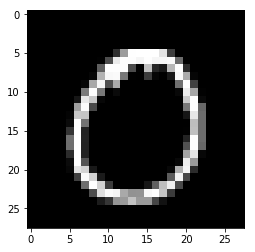

In [13]:
import random
img = random.choice(mnist.test.images)
plt.imshow(img.reshape([28,28]))
plt.gray()
plt.show()

In [14]:
probs = y_conv.eval(feed_dict={x: [img]})
print(probs)
highest_value = np.argmax(probs)

[[ 11.54107857  -5.4101696    3.47127748  -3.43387961 -10.98321056
    0.85571182  -5.8877182   -4.1686964    0.22792655   4.32813215]]


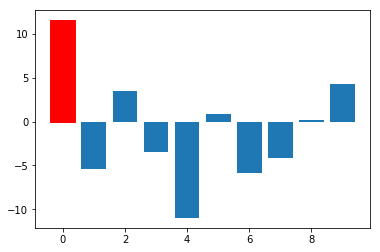

In [15]:
# Visualize the log-probabilities
bars = plt.bar(range(10), y_conv.eval(feed_dict={x: [img] })[0])
bars[highest_value].set_color('r')
plt.show()